# Análisis y Proyección Comportamiento de Envases LOGÍSTICA S.A.

### Guillermo Edwards

# ABSTRACT

## Introducción: 

La empresa Logística S.A. utiliza distintos envases (pallet y bandejas) para sus operaciones diarias, por lo que necesita un análisis robusto para la toma de decisiones sobre compra y utilización de los mismos. La base de datos original, contiene información sobre movimientos de compra (101, y 102 para reversa) y desguace (711, y 712 para reversa), tipo de material (bandejas, recicladas y vírgenes, y pallet), fecha, cantidades, importes y proveedor (en caso de compra) correspondientes a cada movimiento. Para la manipulación, análisis y modelado de la base de datos se utilizó la plataforma Jupyter Notebook, donde se crearon códigos de lenguaje Python y librerías Pandas, Numpy, Matplotlib, Seaborn, Sklearn, y Xgboost.

## Códigos:

### Bandejas:
Simple: 800940-001  
Mini: 800941-001, 800941-002 (reciclada), 800941-003 (reciclada)  
Doble: 800945-001, 800945-002 (reciclada)  
Doble Mini: 900946-001  
Canastillo: 800990-001  

### Pallet:
UHT: 800980-002  
Yoghurt: 800981-002  

### Clase de Movimientos (CMv):
Compra: 101  
Reversa Compra: 102  
Desguace: 711  
Reversa Desguace: 712  

# Primera parte: Análisis preliminar

## Hipótesis y preguntas de interés

- ¿Existe una estacionalidad, en la compra de bandejas recicladas, diferente a la del volumen total de bandejas?
- A mayor volumen de compra, mayor precio promedio de compra.

## Objetivo

- Realizar cálculos y visualizaciones para análisis inicial
- Identificar comportamientos para realizar conclusiones preliminares y tomar decisiones sobre próximos pasos

In [17]:
#Importar librerías

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
#importar dataset

df = pd.read_excel('C:\\Users\\Guillermo Edwards\\OneDrive\\Desktop\\Laburo\\Portafolio\\Dataset Envases LOGISTICA.xlsx')

print(df.head())

    Ce.  Alm.   Doc.mat.    Material                    Denomin.  CMv  \
0  1000  1004  502927101  800945-002     BANDEJA DOBLE RECICLADA  101   
1  1000  1004  502927105  800945-001          BANDEJA DOBLE (EX)  101   
2  1000  1004  502927110  800941-002      BANDEJA MINI RECICLADA  101   
3  1000  1004  502927113  800945-002     BANDEJA DOBLE RECICLADA  101   
4  1000  1004  502927118  800980-002  PALLETS ALAMO 1,0X1,20 UHT  101   

    Cantidad  UMB     Importe ML  Fecha doc.  ...      Hora      Lote  \
0       2160  UND        1231200  04.01.2021  ...  0.699618  10901523   
1       4320  UND        2851200  04.01.2021  ...  0.701123  10901529   
2       6300  UND        2841300  04.01.2021  ...  0.702396  10901532   
3       2160  UND        1231200  04.01.2021  ...  0.703808  10901534   
4        210  UND        1060500  04.01.2021  ...  0.712975  10901578   

       Usuario        Pedido  Referencia Cliente  Txt.cab.doc. Orden  \
0  3NCHAMORROP  1.850012e+09       52068     NaN  

In [19]:
#limpiar nombres columnas
df.columns = df.columns.str.strip()

print(df.columns.tolist())

['Ce.', 'Alm.', 'Doc.mat.', 'Material', 'Denomin.', 'CMv', 'Cantidad', 'UMB', 'Importe ML', 'Fecha doc.', 'Fe.contab.', 'Hora', 'Lote', 'Usuario', 'Pedido', 'Referencia', 'Cliente', 'Txt.cab.doc.', 'Orden', 'Proveedor', 'D/H']


In [20]:
#verificar info DF

print(df.dtypes)

print(df.info())

Ce.               int64
Alm.              int64
Doc.mat.          int64
Material         object
Denomin.         object
CMv               int64
Cantidad          int64
UMB              object
Importe ML        int64
Fecha doc.       object
Fe.contab.       object
Hora             object
Lote             object
Usuario          object
Pedido          float64
Referencia       object
Cliente         float64
Txt.cab.doc.     object
Orden           float64
Proveedor        object
D/H              object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ce.           7482 non-null   int64  
 1   Alm.          7482 non-null   int64  
 2   Doc.mat.      7482 non-null   int64  
 3   Material      7482 non-null   object 
 4   Denomin.      7482 non-null   object 
 5   CMv           7482 non-null   int64  
 6   Cantidad      7482 non-nul

In [21]:
# Valores Nulos

print(df.isnull().sum())

Ce.                0
Alm.               0
Doc.mat.           0
Material           0
Denomin.           0
CMv                0
Cantidad           0
UMB                0
Importe ML         0
Fecha doc.         0
Fe.contab.         0
Hora               0
Lote             253
Usuario            0
Pedido          4189
Referencia         3
Cliente         7482
Txt.cab.doc.      12
Orden           7482
Proveedor       4189
D/H                0
dtype: int64


In [22]:
# Valores Nulos (de los valores nulos vistos en la celda anterior, solo nos interesa "Proveedor" en casos de compra (CMv = 101))

print(df[df['CMv'] == 101].isnull().sum())

Ce.                0
Alm.               0
Doc.mat.           0
Material           0
Denomin.           0
CMv                0
Cantidad           0
UMB                0
Importe ML         0
Fecha doc.         0
Fe.contab.         0
Hora               0
Lote               0
Usuario            0
Pedido             0
Referencia         0
Cliente         3256
Txt.cab.doc.       8
Orden           3256
Proveedor          0
D/H                0
dtype: int64


In [23]:
# Duplicados

duplicados = df[df['Doc.mat.'].duplicated(keep=False)]
print(duplicados.sort_values(by='Doc.mat.'))

       Ce.  Alm.    Doc.mat.    Material                 Denomin.  CMv  \
14    1000  1004   494248411  000980-001               PALLET UHT  712   
15    1000  1004   494248411  000980-001               PALLET UHT  712   
16    1000  1004   494248411  000981-001           PALLET YOGHURT  712   
17    1000  1004   494248411  000981-001           PALLET YOGHURT  712   
26    1000  1004   494295231  000941-001             BANDEJA MINI  711   
...    ...   ...         ...         ...                      ...  ...   
7118  1000  1004  5000420004  900946-001       BANDEJA DOBLE MINI  101   
7032  1000  1004  5000420462  800945-002  BANDEJA DOBLE RECICLADA  101   
7218  1000  1004  5000420462  800945-002  BANDEJA DOBLE RECICLADA  101   
7033  1000  1004  5000420466  900946-001       BANDEJA DOBLE MINI  101   
7219  1000  1004  5000420466  900946-001       BANDEJA DOBLE MINI  101   

      Cantidad  UMB  Importe ML  Fecha doc.  ...      Hora    Lote  \
14         150  UND           0  06.01.20

In [24]:
# Duplicados (compra)

duplicados = df[df['Doc.mat.'].duplicated(keep=False)]
print(duplicados[duplicados['CMv'] == 101].sort_values(by='Doc.mat.'))

       Ce.  Alm.    Doc.mat.    Material                        Denomin.  CMv  \
2948  1000  1004  5000037947  800940-001             BANDEJA SIMPLE (EX)  101   
2949  1000  1004  5000037947  800941-002          BANDEJA MINI RECICLADA  101   
7247  1000  1004  5000417332  800981-002  PALLETS ALAMO 0.87X1,32 YOGURT  101   
7085  1000  1004  5000417332  800981-002  PALLETS ALAMO 0.87X1,32 YOGURT  101   
7248  1000  1004  5000417337  800981-002  PALLETS ALAMO 0.87X1,32 YOGURT  101   
7088  1000  1004  5000417337  800981-002  PALLETS ALAMO 0.87X1,32 YOGURT  101   
7249  1000  1004  5000417359  800941-002          BANDEJA MINI RECICLADA  101   
7089  1000  1004  5000417359  800941-002          BANDEJA MINI RECICLADA  101   
7090  1000  1004  5000417361  800941-002          BANDEJA MINI RECICLADA  101   
7250  1000  1004  5000417361  800941-002          BANDEJA MINI RECICLADA  101   
7091  1000  1004  5000417369  800981-002  PALLETS ALAMO 0.87X1,32 YOGURT  101   
7251  1000  1004  5000417369

In [25]:
# Eliminar duplicados (excluimos los registros [2948, 2949] ya que son movimientos diferentes realizados con un mismo documento por error de procedimiento)

duplicados = df[df['Doc.mat.'].duplicated()]
duplicados = duplicados[duplicados['CMv'] == 101]
duplicados = duplicados[~duplicados.index.isin([2948, 2949])]
df = df.drop(index=duplicados.index)

In [26]:
duplicados = df[df['Doc.mat.'].duplicated(keep=False)]
print(duplicados[duplicados['CMv'] == 101])

       Ce.  Alm.    Doc.mat.    Material                Denomin.  CMv  \
2948  1000  1004  5000037947  800940-001     BANDEJA SIMPLE (EX)  101   
2949  1000  1004  5000037947  800941-002  BANDEJA MINI RECICLADA  101   

      Cantidad  UMB  Importe ML  Fecha doc.  ...      Hora      Lote  \
2948      1620  UND     1509840  26.11.2021  ...  0.604641  11885754   
2949      3375  UND     1518750  26.11.2021  ...  0.604641  11885753   

          Usuario        Pedido  Referencia Cliente  Txt.cab.doc. Orden  \
2948  3NCHAMORROP  1.850012e+09      746357     NaN         Wenco   NaN   
2949  3NCHAMORROP  1.850012e+09      746357     NaN         Wenco   NaN   

      Proveedor D/H  
2948  921470002   S  
2949  921470002   S  

[2 rows x 21 columns]


In [27]:
#limpiar columnas no necesarias
df.drop(['Ce.', 'Alm.', 'UMB', 'Orden', 'Hora', 'Lote', 'Usuario', 'Cliente', 'Referencia'], axis=1, inplace=True)

print(df.columns.tolist())

['Doc.mat.', 'Material', 'Denomin.', 'CMv', 'Cantidad', 'Importe ML', 'Fecha doc.', 'Fe.contab.', 'Pedido', 'Txt.cab.doc.', 'Proveedor', 'D/H']


In [28]:
#limpiar filas (solo nos quedamos con los movimientos de materiales de interés)

valores_permitidos = ['800945-002', '800945-001', '800941-002', '800980-002', 
                      '800981-002', '800940-001', '800990-001', '800941-001', 
                      '900946-001', '800941-003']

df = df[df['Material'].isin(valores_permitidos)]

print(df.head())

valores_unicos = df['Material'].unique()
print(valores_unicos)

    Doc.mat.    Material                    Denomin.  CMv  Cantidad  \
0  502927101  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
1  502927105  800945-001          BANDEJA DOBLE (EX)  101      4320   
2  502927110  800941-002      BANDEJA MINI RECICLADA  101      6300   
3  502927113  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
4  502927118  800980-002  PALLETS ALAMO 1,0X1,20 UHT  101       210   

   Importe ML  Fecha doc.  Fe.contab.        Pedido Txt.cab.doc.  Proveedor  \
0     1231200  04.01.2021  04.01.2021  1.850012e+09      Playcar  780849304   
1     2851200  04.01.2021  04.01.2021  1.850012e+09        Wenco  921470002   
2     2841300  04.01.2021  04.01.2021  1.850012e+09      Logipak  763493512   
3     1231200  04.01.2021  04.01.2021  1.850012e+09      Playcar  780849304   
4     1060500  04.01.2021  04.01.2021  1.850012e+09     Pataguas  760802700   

  D/H  
0   S  
1   S  
2   S  
3   S  
4   S  
['800945-002' '800945-001' '800941-002' '800980-00

In [29]:
#Convertir columnas fecha
df['Fecha doc.'] = pd.to_datetime(df['Fecha doc.'], dayfirst=True)
df['Fe.contab.'] = pd.to_datetime(df['Fe.contab.'], dayfirst=True)

print(df.head())

print(df.dtypes)

print(df.info())

    Doc.mat.    Material                    Denomin.  CMv  Cantidad  \
0  502927101  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
1  502927105  800945-001          BANDEJA DOBLE (EX)  101      4320   
2  502927110  800941-002      BANDEJA MINI RECICLADA  101      6300   
3  502927113  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
4  502927118  800980-002  PALLETS ALAMO 1,0X1,20 UHT  101       210   

   Importe ML Fecha doc. Fe.contab.        Pedido Txt.cab.doc.  Proveedor D/H  
0     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  780849304   S  
1     2851200 2021-01-04 2021-01-04  1.850012e+09        Wenco  921470002   S  
2     2841300 2021-01-04 2021-01-04  1.850012e+09      Logipak  763493512   S  
3     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  780849304   S  
4     1060500 2021-01-04 2021-01-04  1.850012e+09     Pataguas  760802700   S  
Doc.mat.                 int64
Material                object
Denomin.                object


In [30]:
#Agregar columna tipo envase (para el análisis necesitamos diferenciar entre bandejas recicladas y vírgenes)

bandejas_virgenes = ['800945-001', '800940-001', '800990-001', '800941-001', '900946-001']
bandejas_recicladas = ['800945-002', '800941-002', '800941-003']
pallets = ['800980-002', '800981-002']

df['Tipo Envase'] = df['Material'].apply(
    lambda x: 'Bandeja Virgen' if x in bandejas_virgenes
                                else 'Bandeja Reciclada' if x in bandejas_recicladas
                                                            else 'Pallet' if x in pallets 
                                                                            else 'NA'
                                                                                    )

print(df[['Material', 'Tipo Envase']].head())

     Material        Tipo Envase
0  800945-002  Bandeja Reciclada
1  800945-001     Bandeja Virgen
2  800941-002  Bandeja Reciclada
3  800945-002  Bandeja Reciclada
4  800980-002             Pallet


## Pregunta 1: estacionalidad bandejas recicladas (trimestral)

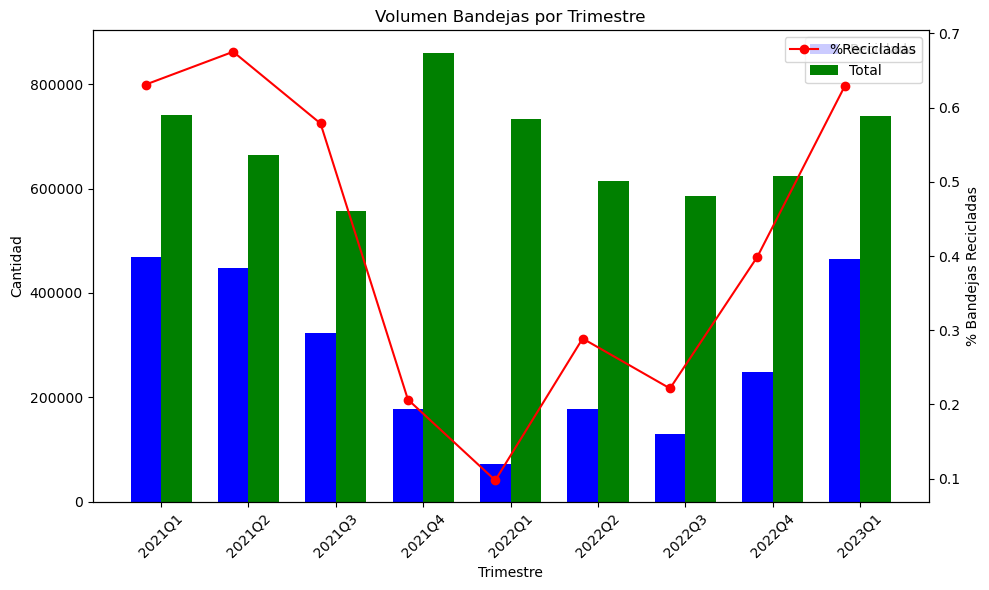

                    Cantidad_Reciclada  Cantidad_Total
Cantidad_Reciclada            1.000000        0.064466
Cantidad_Total                0.064466        1.000000


In [31]:
#Columna Trimestre (realizaremos análisis preliminar por trimestre)

df['Trimestre'] = df['Fe.contab.'].dt.to_period('Q')
df_filtrado = df[df['Trimestre'] <= '2023Q1']

#Filtro
df_CompraR = df_filtrado[(df_filtrado['CMv'].isin([101, 102])) & (df_filtrado['Tipo Envase'] == 'Bandeja Reciclada')]
df_CompraT = df_filtrado[(df_filtrado['CMv'].isin([101, 102])) & (df_filtrado['Tipo Envase'].str.startswith('Bandeja'))]

#Cantidad de compra por trimestre
CantidadR_Tri = df_CompraR.groupby('Trimestre')['Cantidad'].sum().reset_index()
CantidadT_Tri = df_CompraT.groupby('Trimestre')['Cantidad'].sum().reset_index()

#Proporción Bandejas Recicladas
PropR = CantidadR_Tri['Cantidad']/CantidadT_Tri['Cantidad']


#Gráfico
fig, ax = plt.subplots(figsize=(10, 6))

#ancho barras
AnchBarr = 0.35

#posición barras
r1 = np.arange(len(CantidadR_Tri))
r2 = [x + AnchBarr for x in r1]

ax.bar(r1, CantidadR_Tri['Cantidad'], color='b', width=AnchBarr, label='Reciclada')
ax.bar(r2, CantidadT_Tri['Cantidad'], color='g', width=AnchBarr, label='Total')
ax.set_xlabel('Trimestre')
ax.set_ylabel('Cantidad')
ax.set_title('Volumen Bandejas por Trimestre')
ax.set_xticks([r + AnchBarr / 2 for r in range(len(CantidadR_Tri))])
ax.set_xticklabels(CantidadR_Tri['Trimestre'].astype(str), rotation=45)
ax.legend()

ax2 = ax.twinx()
ax2.plot(r1, PropR, color='r', marker='o', linestyle='-', label='%Recicladas')
ax2.set_ylabel('% Bandejas Recicladas')
ax2.legend(loc='upper right')

plt.tight_layout()


plt.show()


df_Vol = pd.merge(CantidadR_Tri[['Trimestre', 'Cantidad']], CantidadT_Tri[['Trimestre', 'Cantidad']], on='Trimestre', suffixes=('_Reciclada', '_Total'))
Corr_Vol = df_Vol[['Cantidad_Reciclada', 'Cantidad_Total']].corr()
                      
print(Corr_Vol)     

## Conclusión preliminar

Luego del análisis, se puede ver que existe similitud entre el comportamiento de volúmenes para bandejas recicladas versus el total, solamente en parte del periodo. Esto se debería a la capacidad de compra de las primeras (disponibilidad de proveedor).

## Hipótesis 2: a mayor volumen de compra, mayor precio promedio de compra.

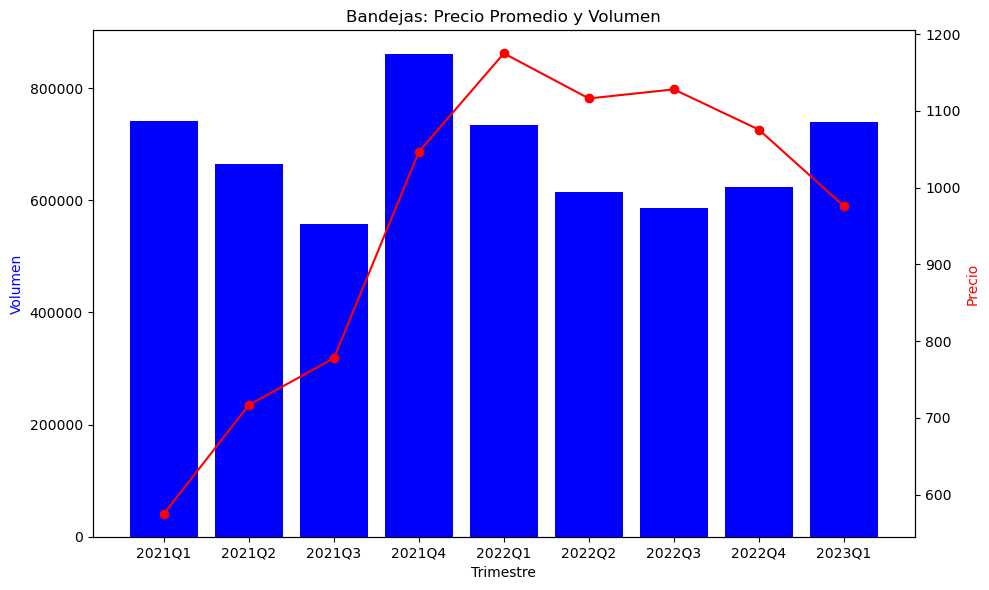

          Cantidad    Precio
Cantidad  1.000000 -0.012852
Precio   -0.012852  1.000000


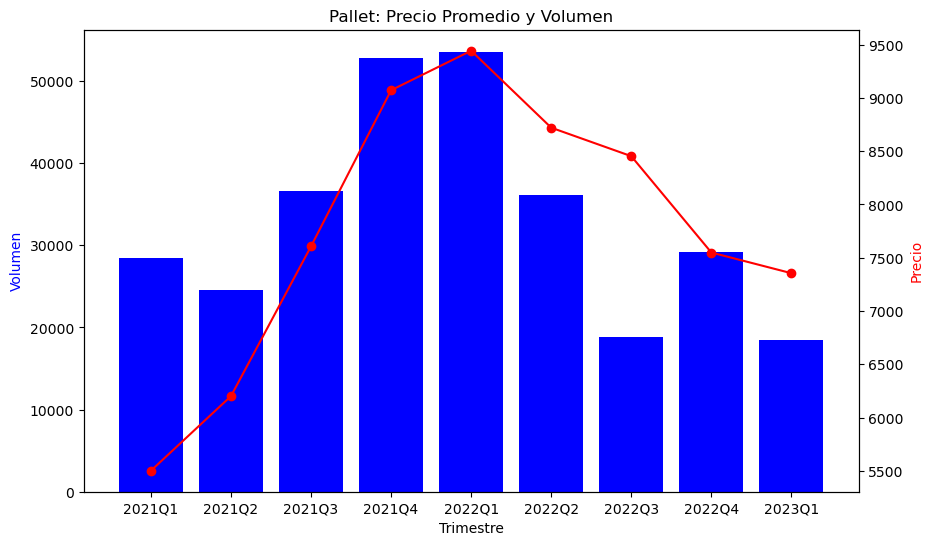

          Cantidad    Precio
Cantidad  1.000000  0.610876
Precio    0.610876  1.000000


In [32]:
#Filtro Bandejas
df_CompraB = df_filtrado[(df_filtrado['CMv'].isin([101, 102])) & (df_filtrado['Tipo Envase'].str.startswith('Bandeja'))]

#Filtro Pallet
df_CompraP = df_filtrado[(df_filtrado['CMv'].isin([101, 102])) & (df_filtrado['Tipo Envase'] == 'Pallet')]
                                           
                                           

#Cantidad e Importe compra bandejas por trimestre
Bandejas_Tri = df_CompraB.groupby('Trimestre')[['Cantidad', 'Importe ML']].sum().reset_index()
                                           
#Precio Promedio Bandejas
Bandejas_Tri['Precio'] = Bandejas_Tri['Importe ML']/Bandejas_Tri['Cantidad']
                                           
#Gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))  

ax1.bar(Bandejas_Tri['Trimestre'].astype(str), Bandejas_Tri['Cantidad'], color='b', label='Volumen')
ax1.set_xlabel('Trimestre')
ax1.set_ylabel('Volumen', color='b')

ax2 = ax1.twinx()
ax2.plot(Bandejas_Tri['Trimestre'].astype(str), Bandejas_Tri['Precio'], color='r', marker='o', label='Precio Promedio')
ax2.set_ylabel('Precio', color='r')                        

plt.title('Bandejas: Precio Promedio y Volumen')                        
fig.tight_layout()                        
                        
plt.show() 

#Correlación Precio Volumen
Corr_B = Bandejas_Tri[['Cantidad', 'Precio']].corr()
                      
print(Corr_B)                      
                        
                        
                        
                        
#Cantidad e Importe compra pallet por trimestre
Pallet_Tri = df_CompraP.groupby('Trimestre')[['Cantidad', 'Importe ML']].sum().reset_index()
                                           
#Precio Promedio Pallet
Pallet_Tri['Precio'] = Pallet_Tri['Importe ML']/Pallet_Tri['Cantidad']
                                           
#Gráfico
fig2, ax1 = plt.subplots(figsize=(10, 6))                                           

ax1.bar(Pallet_Tri['Trimestre'].astype(str), Pallet_Tri['Cantidad'], color='b', label='Volumen')
ax1.set_xlabel('Trimestre')
ax1.set_ylabel('Volumen', color='b')

ax2 = ax1.twinx()
ax2.plot(Pallet_Tri['Trimestre'].astype(str), Pallet_Tri['Precio'], color='r', marker='o', label='Precio Promedio')
ax2.set_ylabel('Precio', color='r')                        

plt.title('Pallet: Precio Promedio y Volumen')                        
fig.tight_layout()                        
                        
plt.show()                         
                      
                      
#Correlación Precio Volumen
Corr_P = Pallet_Tri[['Cantidad', 'Precio']].corr()
                      
print(Corr_P)                      

## Conclusión preliminar

En el caso de pallets, se puede observar una correlación importante entre el volumen de compra y el precio promedio de la misma. Esto se debería a que los proveedores con mejor precio cuentan con oferta limitada. Para el caso de las bandejas se requiere otro tipo de análisis, que considere bandejas recicladas y vírgenes por separado.

# Segunda Parte: Modelo de Predicción Precio Envases LOGÍSTICA S.A.
La empresa LOGÍSTICA S.A. necesita un modelo de predicción de precio para cada uno de sus envases. Para esto se utilizará información sobre tipos de envase, cantidades de compra, fechas, proveedores,

## Objetivo

Obtener un modelo que pueda estimar de forma eficaz los precios de cada material, y entender qué variables tienen influencia en el mismo, para así poder salir a buscar negociaciones con proveedores de forma anticipada.

In [33]:
# Importar

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
import statsmodels.api as sm

In [34]:
# Reorganización del Dataset

# Columna Mes (el modelo realizará predicciones de precios por mes)
df['Mes-Año'] = df['Fe.contab.'].dt.to_period('M')
df['Mes'] = df['Fe.contab.'].dt.month

# Columna Clase: agrupa envases sin importar si son reciclados o vírgenes
df['Clase'] = df['Material'].str[:6]


print(df.head())

print(df.info())

    Doc.mat.    Material                    Denomin.  CMv  Cantidad  \
0  502927101  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
1  502927105  800945-001          BANDEJA DOBLE (EX)  101      4320   
2  502927110  800941-002      BANDEJA MINI RECICLADA  101      6300   
3  502927113  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
4  502927118  800980-002  PALLETS ALAMO 1,0X1,20 UHT  101       210   

   Importe ML Fecha doc. Fe.contab.        Pedido Txt.cab.doc.  Proveedor D/H  \
0     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  780849304   S   
1     2851200 2021-01-04 2021-01-04  1.850012e+09        Wenco  921470002   S   
2     2841300 2021-01-04 2021-01-04  1.850012e+09      Logipak  763493512   S   
3     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  780849304   S   
4     1060500 2021-01-04 2021-01-04  1.850012e+09     Pataguas  760802700   S   

         Tipo Envase Trimestre  Mes-Año  Mes   Clase  
0  Bandeja Reciclada    2021Q1 

In [35]:
# Filtrar por Compras

df_C = df[df['CMv'] == 101].copy()

# Columna precio

df_C['Precio'] = df_C['Importe ML']/df_C['Cantidad']


print(df_C.head())

print(df_C.info())

    Doc.mat.    Material                    Denomin.  CMv  Cantidad  \
0  502927101  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
1  502927105  800945-001          BANDEJA DOBLE (EX)  101      4320   
2  502927110  800941-002      BANDEJA MINI RECICLADA  101      6300   
3  502927113  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
4  502927118  800980-002  PALLETS ALAMO 1,0X1,20 UHT  101       210   

   Importe ML Fecha doc. Fe.contab.        Pedido Txt.cab.doc.  Proveedor D/H  \
0     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  780849304   S   
1     2851200 2021-01-04 2021-01-04  1.850012e+09        Wenco  921470002   S   
2     2841300 2021-01-04 2021-01-04  1.850012e+09      Logipak  763493512   S   
3     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  780849304   S   
4     1060500 2021-01-04 2021-01-04  1.850012e+09     Pataguas  760802700   S   

         Tipo Envase Trimestre  Mes-Año  Mes   Clase  Precio  
0  Bandeja Reciclada   

In [36]:
valores_unicos = df['Material'].unique()
print(valores_unicos)

['800945-002' '800945-001' '800941-002' '800980-002' '800981-002'
 '800940-001' '800990-001' '800941-001' '900946-001' '800941-003']


In [37]:
# Outliers: Desviación Estándar

for i in valores_unicos:
    media = np.mean(df_C[df_C['Material'] == i]['Precio'])
    DE = np.std(df_C[df_C['Material'] == i]['Precio'])
    umbral = 3
    outliers = df_C[(df_C['Material'] == i) & (np.abs(df_C['Precio'] - media) > umbral*DE)]
    print(f"la media es", media)
    print(f"outliers de {i} son:", outliers)

la media es 843.5800865800866
outliers de 800945-002 son: Empty DataFrame
Columns: [Doc.mat., Material, Denomin., CMv, Cantidad, Importe ML, Fecha doc., Fe.contab., Pedido, Txt.cab.doc., Proveedor, D/H, Tipo Envase, Trimestre, Mes-Año, Mes, Clase, Precio]
Index: []
la media es 1175.8695652173913
outliers de 800945-001 son:        Doc.mat.    Material            Denomin.  CMv  Cantidad  Importe ML  \
1     502927105  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
41    502931982  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
42    502931987  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
708   502971838  800945-001  BANDEJA DOBLE (EX)  101      2160     1425600   
735   502974783  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
746   502976181  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
760   502976383  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
873   502980449  800945-001  BANDEJA DOBLE (EX)  10

la media es 1095.0272952853597
outliers de 800940-001 son: Empty DataFrame
Columns: [Doc.mat., Material, Denomin., CMv, Cantidad, Importe ML, Fecha doc., Fe.contab., Pedido, Txt.cab.doc., Proveedor, D/H, Tipo Envase, Trimestre, Mes-Año, Mes, Clase, Precio]
Index: []
la media es 1313.4303797468353
outliers de 800990-001 son: Empty DataFrame
Columns: [Doc.mat., Material, Denomin., CMv, Cantidad, Importe ML, Fecha doc., Fe.contab., Pedido, Txt.cab.doc., Proveedor, D/H, Tipo Envase, Trimestre, Mes-Año, Mes, Clase, Precio]
Index: []
la media es 1103.4628975265018
outliers de 800941-001 son:         Doc.mat.    Material           Denomin.  CMv  Cantidad  Importe ML  \
2629  5000009657  800941-001  BANDEJA MINI (EX)  101      6480     3350160   
2632  5000009956  800941-001  BANDEJA MINI (EX)  101      6480     3350160   
2823  5000022004  800941-001  BANDEJA MINI (EX)  101      6480     3350160   
2824  5000022009  800941-001  BANDEJA MINI (EX)  101      6480     3350160   
6672  5000373133 

In [38]:
# Outliers: Percentiles

for i in valores_unicos:
    Q1 = df_C[df_C['Material'] == i]['Precio'].quantile(0.25)
    Q3 = df_C[df_C['Material'] == i]['Precio'].quantile(0.75)
    IQR = Q3 - Q1
    li = Q1 - 1.5*IQR
    ls = Q3 + 1.5*IQR
    outliers = df_C[(df_C['Material'] == i) & ((df_C['Precio'] < li) | (df_C['Precio'] > ls))]
    print(f"para", i)
    print(f"límite inferior es", li)
    print(f"límite superior es", ls)
    print(f"outliers son:", outliers)

para 800945-002
límite inferior es 210.0
límite superior es 1442.0
outliers son: Empty DataFrame
Columns: [Doc.mat., Material, Denomin., CMv, Cantidad, Importe ML, Fecha doc., Fe.contab., Pedido, Txt.cab.doc., Proveedor, D/H, Tipo Envase, Trimestre, Mes-Año, Mes, Clase, Precio]
Index: []
para 800945-001
límite inferior es 802.5
límite superior es 1566.5
outliers son:        Doc.mat.    Material            Denomin.  CMv  Cantidad  Importe ML  \
1     502927105  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
41    502931982  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
42    502931987  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
708   502971838  800945-001  BANDEJA DOBLE (EX)  101      2160     1425600   
735   502974783  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
746   502976181  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
760   502976383  800945-001  BANDEJA DOBLE (EX)  101      4320     2851200   
873   

para 800940-001
límite inferior es 907.5
límite superior es 1367.5
outliers son:       Doc.mat.    Material             Denomin.  CMv  Cantidad  Importe ML  \
11   502928964  800940-001  BANDEJA SIMPLE (EX)  101      2160     1399680   
12   502928966  800940-001  BANDEJA SIMPLE (EX)  101      2160     1399680   
25   502930791  800940-001  BANDEJA SIMPLE (EX)  101      4140     2691000   
38   502930808  800940-001  BANDEJA SIMPLE (EX)  101      4320     2808000   
76   502946988  800940-001  BANDEJA SIMPLE (EX)  101      4320     2799360   
80   502948251  800940-001  BANDEJA SIMPLE (EX)  101      4320     2808000   
81   502948258  800940-001  BANDEJA SIMPLE (EX)  101      5040     3381840   
83   502948274  800940-001  BANDEJA SIMPLE (EX)  101      2160     1399680   
84   502948277  800940-001  BANDEJA SIMPLE (EX)  101      2160     1399680   
609  502954106  800940-001  BANDEJA SIMPLE (EX)  101      5040     3381840   
620  502954966  800940-001  BANDEJA SIMPLE (EX)  101      432

800945-002


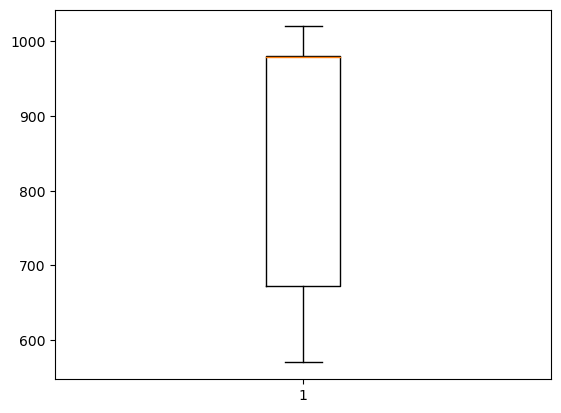

800945-001


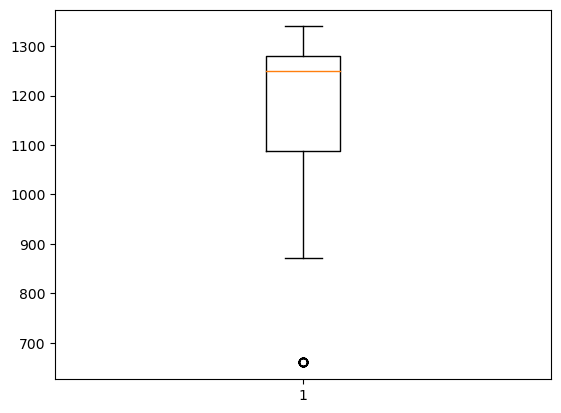

800941-002


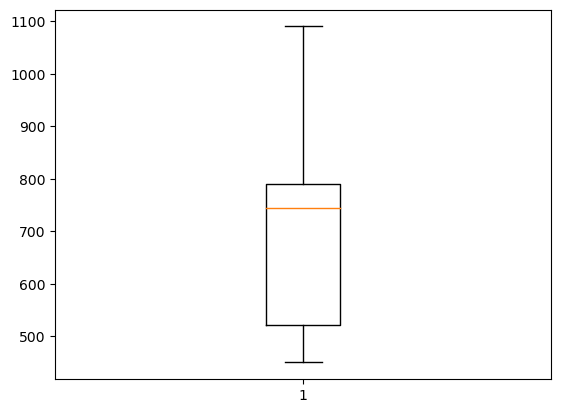

800980-002


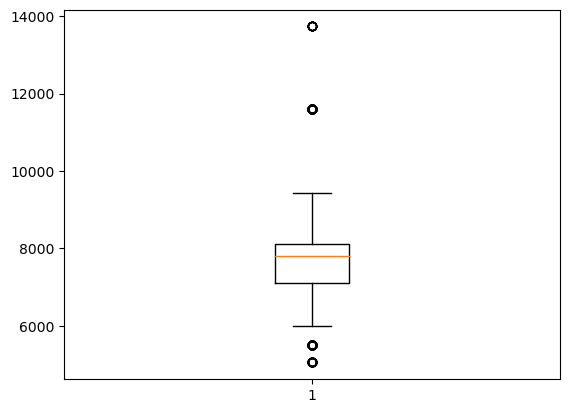

800981-002


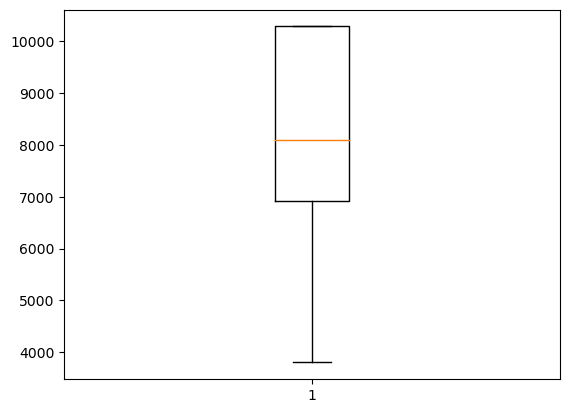

800940-001


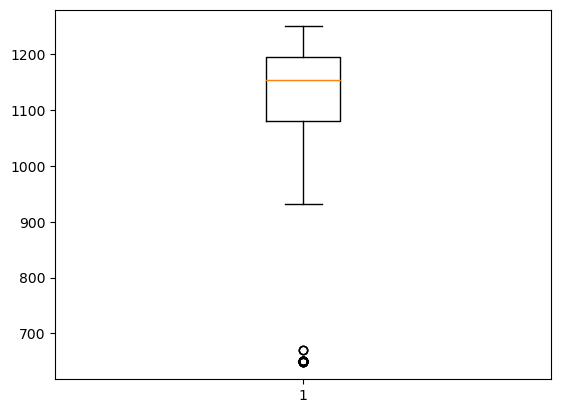

800990-001


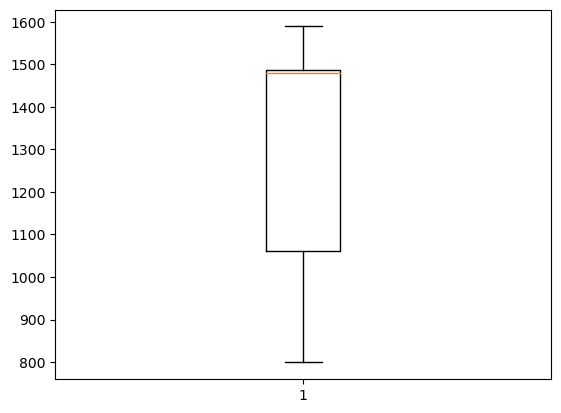

800941-001


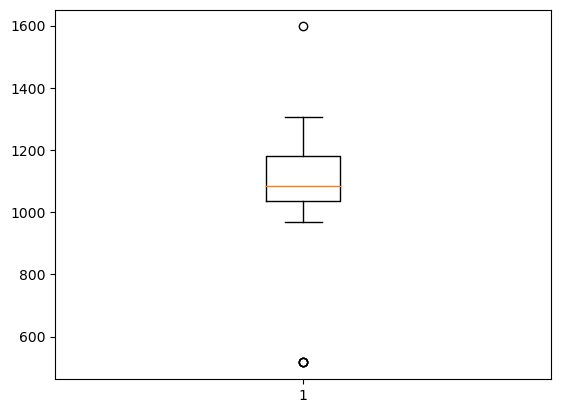

900946-001


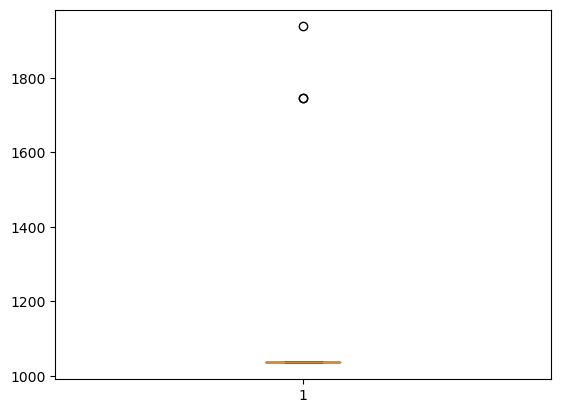

800941-003


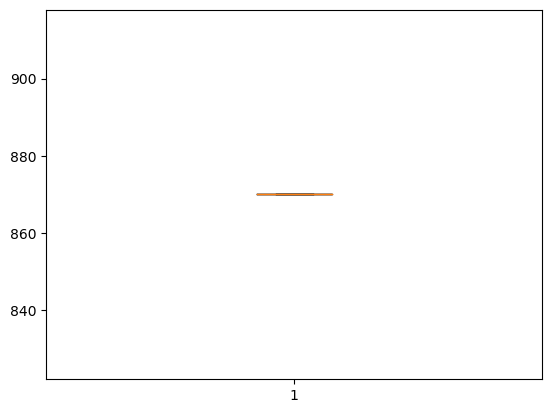

In [39]:
# Outliers: BOXPLOT

for i in valores_unicos:
    plt.boxplot(df_C[df_C['Material'] == i]['Precio'])
    print(i)
    plt.show()

### Los outliers revisados se consideran como consecuentes con la tendencia en su fecha de imputación, por lo que se mantienen en el modelo

In [40]:
# One Hot Encoding para Proveedor y Tipo de Envase (necesitamos darle valor binario a estos atributos para utilizarlos en el modelo)

df_Enc = pd.get_dummies(df_C, columns=['Proveedor', 'Tipo Envase'])


# Encoding para columnas de clasificación no numéricas (se les da un código numérico las variables de fecha)

columnas = ['Material', 'Mes-Año']

label_encoders = {}
Diccionario_Cod = {}

for col in columnas:
    le = LabelEncoder()
    df_Enc[col + '_codigo'] = le.fit_transform(df_Enc[col]) + 1
    label_encoders[col] = le
    Diccionario_Cod[col] = dict(zip(range(1, len(le.classes_) + 1), le.classes_))


print(df_Enc.head())
print(Diccionario_Cod)

    Doc.mat.    Material                    Denomin.  CMv  Cantidad  \
0  502927101  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
1  502927105  800945-001          BANDEJA DOBLE (EX)  101      4320   
2  502927110  800941-002      BANDEJA MINI RECICLADA  101      6300   
3  502927113  800945-002     BANDEJA DOBLE RECICLADA  101      2160   
4  502927118  800980-002  PALLETS ALAMO 1,0X1,20 UHT  101       210   

   Importe ML Fecha doc. Fe.contab.        Pedido Txt.cab.doc.  ...  \
0     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  ...   
1     2851200 2021-01-04 2021-01-04  1.850012e+09        Wenco  ...   
2     2841300 2021-01-04 2021-01-04  1.850012e+09      Logipak  ...   
3     1231200 2021-01-04 2021-01-04  1.850012e+09      Playcar  ...   
4     1060500 2021-01-04 2021-01-04  1.850012e+09     Pataguas  ...   

  Proveedor_777230220 Proveedor_779818101 Proveedor_780849304  \
0                   0                   0                   1   
1               

In [41]:
# Limpiar Columnas

df_Enc.drop(['Doc.mat.', 'Material', 'Denomin.', 'CMv', 'Fecha doc.', 'Fe.contab.', 'Pedido', 'Txt.cab.doc.', 'D/H', 'Trimestre', 'Mes-Año'], axis=1, inplace=True)


print(df_Enc.head())
print(df_Enc.info())
print(Diccionario_Cod)

   Cantidad  Importe ML  Mes   Clase  Precio  Proveedor_760802700  \
0      2160     1231200    1  800945   570.0                    0   
1      4320     2851200    1  800945   660.0                    0   
2      6300     2841300    1  800941   451.0                    0   
3      2160     1231200    1  800945   570.0                    0   
4       210     1060500    1  800980  5050.0                    1   

   Proveedor_763493512  Proveedor_766465412  Proveedor_771052851  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Proveedor_771940048  Proveedor_777230220  Proveedor_779818101  \
0                    0                    0                    0   
1                    0                  

In [42]:
# Verificar valores numéricos
valores_unicos = df_Enc['Clase'].unique()
print(valores_unicos)

['800945' '800941' '800980' '800981' '800940' '800990' '900946']


In [43]:
df_Enc['Clase'] = pd.to_numeric(df_Enc['Clase'], errors='coerce')
valores_unicos = df_Enc['Clase'].unique()
print(valores_unicos)

[800945 800941 800980 800981 800940 800990 900946]


In [44]:
print(df_Enc.head())
print(df_Enc.info())
print(Diccionario_Cod)

   Cantidad  Importe ML  Mes   Clase  Precio  Proveedor_760802700  \
0      2160     1231200    1  800945   570.0                    0   
1      4320     2851200    1  800945   660.0                    0   
2      6300     2841300    1  800941   451.0                    0   
3      2160     1231200    1  800945   570.0                    0   
4       210     1060500    1  800980  5050.0                    1   

   Proveedor_763493512  Proveedor_766465412  Proveedor_771052851  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Proveedor_771940048  Proveedor_777230220  Proveedor_779818101  \
0                    0                    0                    0   
1                    0                  

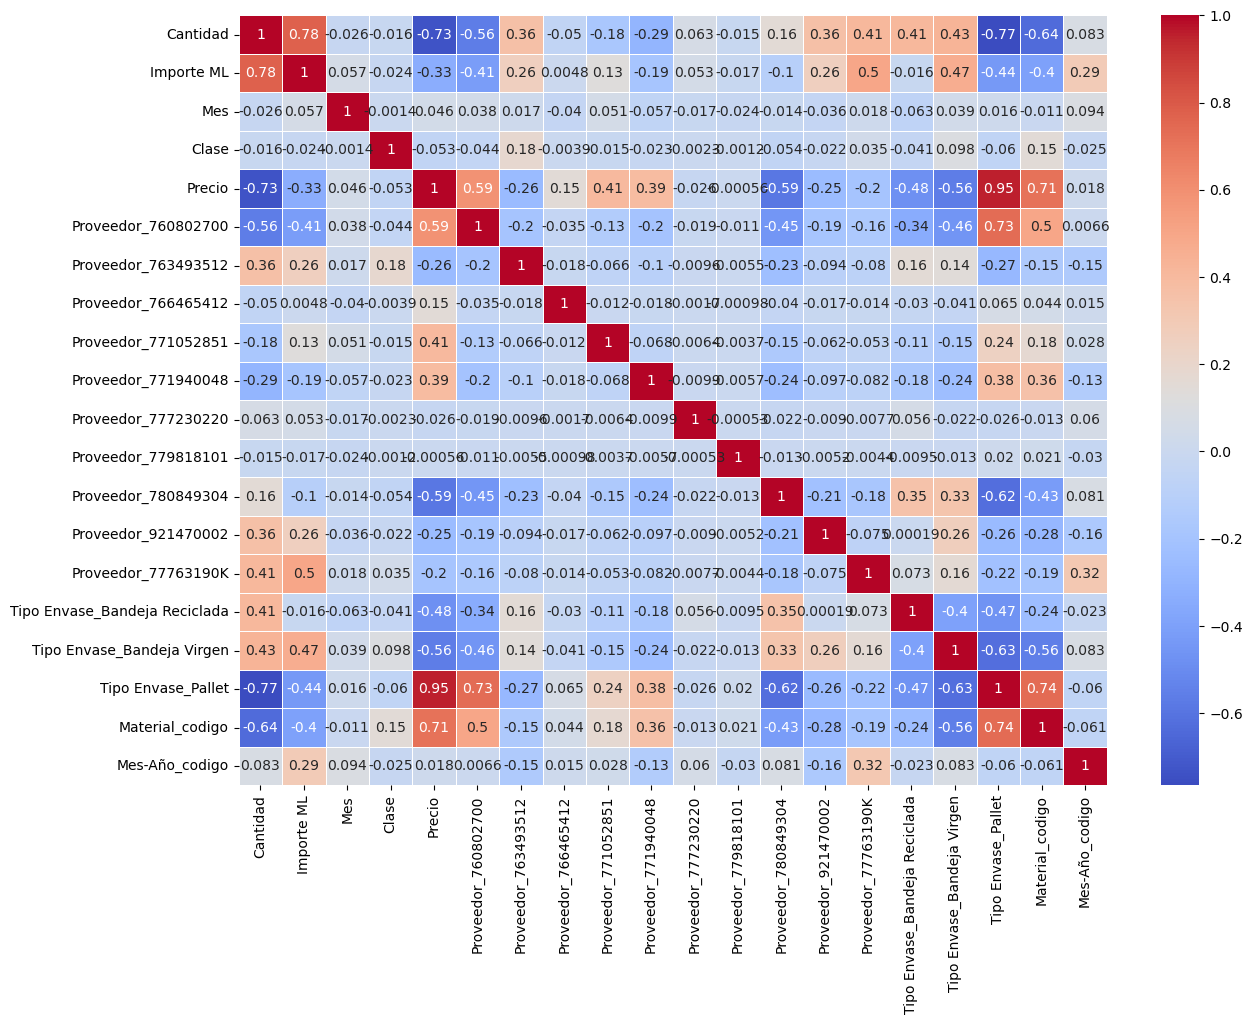

In [45]:
# Matriz correlación

df_Corr = df_Enc.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(df_Corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

In [46]:
df_Enc.drop(['Precio'], axis=1, inplace=True)
print(df_Enc.columns.tolist())

['Cantidad', 'Importe ML', 'Mes', 'Clase', 'Proveedor_760802700', 'Proveedor_763493512', 'Proveedor_766465412', 'Proveedor_771052851', 'Proveedor_771940048', 'Proveedor_777230220', 'Proveedor_779818101', 'Proveedor_780849304', 'Proveedor_921470002', 'Proveedor_77763190K', 'Tipo Envase_Bandeja Reciclada', 'Tipo Envase_Bandeja Virgen', 'Tipo Envase_Pallet', 'Material_codigo', 'Mes-Año_codigo']


In [47]:
df_Enc.drop(['Material_codigo'], axis=1, inplace=True)
print(df_Enc.columns.tolist())

['Cantidad', 'Importe ML', 'Mes', 'Clase', 'Proveedor_760802700', 'Proveedor_763493512', 'Proveedor_766465412', 'Proveedor_771052851', 'Proveedor_771940048', 'Proveedor_777230220', 'Proveedor_779818101', 'Proveedor_780849304', 'Proveedor_921470002', 'Proveedor_77763190K', 'Tipo Envase_Bandeja Reciclada', 'Tipo Envase_Bandeja Virgen', 'Tipo Envase_Pallet', 'Mes-Año_codigo']


In [48]:
print(df_Enc.columns.tolist())

['Cantidad', 'Importe ML', 'Mes', 'Clase', 'Proveedor_760802700', 'Proveedor_763493512', 'Proveedor_766465412', 'Proveedor_771052851', 'Proveedor_771940048', 'Proveedor_777230220', 'Proveedor_779818101', 'Proveedor_780849304', 'Proveedor_921470002', 'Proveedor_77763190K', 'Tipo Envase_Bandeja Reciclada', 'Tipo Envase_Bandeja Virgen', 'Tipo Envase_Pallet', 'Mes-Año_codigo']


In [49]:
# Creando parámetros con mayor peso

columnas_binarias = {'Proveedor_760802700', 'Proveedor_763493512', 'Proveedor_766465412', 'Proveedor_771052851', 'Proveedor_771940048', 'Proveedor_777230220', 'Proveedor_779818101', 'Proveedor_780849304', 'Proveedor_921470002', 'Proveedor_77763190K', 'Tipo Envase_Bandeja Reciclada', 'Tipo Envase_Bandeja Virgen', 'Tipo Envase_Pallet'}

for col in columnas_binarias:
    df_Enc['Cant_' + col] = df_Enc['Cantidad']*df_Enc[col]

print(df_Enc.columns.tolist())

['Cantidad', 'Importe ML', 'Mes', 'Clase', 'Proveedor_760802700', 'Proveedor_763493512', 'Proveedor_766465412', 'Proveedor_771052851', 'Proveedor_771940048', 'Proveedor_777230220', 'Proveedor_779818101', 'Proveedor_780849304', 'Proveedor_921470002', 'Proveedor_77763190K', 'Tipo Envase_Bandeja Reciclada', 'Tipo Envase_Bandeja Virgen', 'Tipo Envase_Pallet', 'Mes-Año_codigo', 'Cant_Proveedor_777230220', 'Cant_Proveedor_771052851', 'Cant_Proveedor_77763190K', 'Cant_Tipo Envase_Bandeja Virgen', 'Cant_Proveedor_921470002', 'Cant_Proveedor_763493512', 'Cant_Proveedor_760802700', 'Cant_Proveedor_771940048', 'Cant_Proveedor_779818101', 'Cant_Proveedor_780849304', 'Cant_Tipo Envase_Bandeja Reciclada', 'Cant_Proveedor_766465412', 'Cant_Tipo Envase_Pallet']


In [50]:
# Cantidad de compra total, cantidad por tipo y proveedor, para cada clase por mes
Compra = df_Enc.groupby(['Clase', 'Mes', 'Mes-Año_codigo'])[['Cantidad', 'Importe ML'] + ['Cant_' + col for col in columnas_binarias]].sum().reset_index()

print(Compra.head())

    Clase  Mes  Mes-Año_codigo  Cantidad  Importe ML  \
0  800940    1               1     30780    20086920   
1  800940    1              13     66600    82945980   
2  800940    1              25     68400    74984400   
3  800940    2               2     35280    23037840   
4  800940    2              14     35820    43060860   

   Cant_Proveedor_777230220  Cant_Proveedor_771052851  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Cant_Proveedor_77763190K  Cant_Tipo Envase_Bandeja Virgen  \
0                         0                            30780   
1                         0                            66600   
2                     25200                            68400   
3                         0                            35280   


In [51]:
# Proporción compra (finalmente, ser dejan las variables de proveedor y tipo de bandeja como porcentajes de la cantidad total)

for col in columnas_binarias:
    Compra['%_' + col] = Compra['Cant_' + col]/Compra['Cantidad']
    Compra.drop(['Cant_' + col], axis=1, inplace=True)

print(Compra.head(10))
print(Compra.info())

    Clase  Mes  Mes-Año_codigo  Cantidad  Importe ML  %_Proveedor_777230220  \
0  800940    1               1     30780    20086920                    0.0   
1  800940    1              13     66600    82945980                    0.0   
2  800940    1              25     68400    74984400                    0.0   
3  800940    2               2     35280    23037840                    0.0   
4  800940    2              14     35820    43060860                    0.0   
5  800940    2              26     36000    39178080                    0.0   
6  800940    3               3     97920    76670100                    0.0   
7  800940    3              15     42660    51415020                    0.0   
8  800940    3              27     54000    58525200                    0.0   
9  800940    4               4      8640     8052480                    0.0   

   %_Proveedor_771052851  %_Proveedor_77763190K  %_Tipo Envase_Bandeja Virgen  \
0                    0.0               0.000000  

In [52]:
print(Compra['%_Tipo Envase_Bandeja Virgen'].unique())

[1.         0.         0.94196429 0.2417795  0.82958199 0.15151515
 0.81948052 0.07954545 0.74285714 0.41335453 0.69047619 0.64705882
 0.68789809 0.32335329 0.85753996 0.39396436 0.55864858 0.41129032
 0.78195489 0.2        0.21364985 0.74793388 0.42934783 0.10714286
 0.99209486 0.12043796 0.91863727 0.01875    0.43993232 0.04
 0.4760274  0.22099448 0.16167665 0.93296089 0.76190476 0.83561644
 0.94845361 0.68319559 0.59259259 0.71317829 0.88111888 0.36885246]


In [53]:
# Precio de compra por mes

Compra['Precio'] = Compra['Importe ML']/Compra['Cantidad']
Compra.drop(['Importe ML'], axis=1, inplace=True)

print(Compra.head())
print(Compra.info())

    Clase  Mes  Mes-Año_codigo  Cantidad  %_Proveedor_777230220  \
0  800940    1               1     30780                    0.0   
1  800940    1              13     66600                    0.0   
2  800940    1              25     68400                    0.0   
3  800940    2               2     35280                    0.0   
4  800940    2              14     35820                    0.0   

   %_Proveedor_771052851  %_Proveedor_77763190K  %_Tipo Envase_Bandeja Virgen  \
0                    0.0               0.000000                           1.0   
1                    0.0               0.000000                           1.0   
2                    0.0               0.368421                           1.0   
3                    0.0               0.000000                           1.0   
4                    0.0               0.000000                           1.0   

   %_Proveedor_921470002  %_Proveedor_763493512  %_Proveedor_760802700  \
0               0.415205            

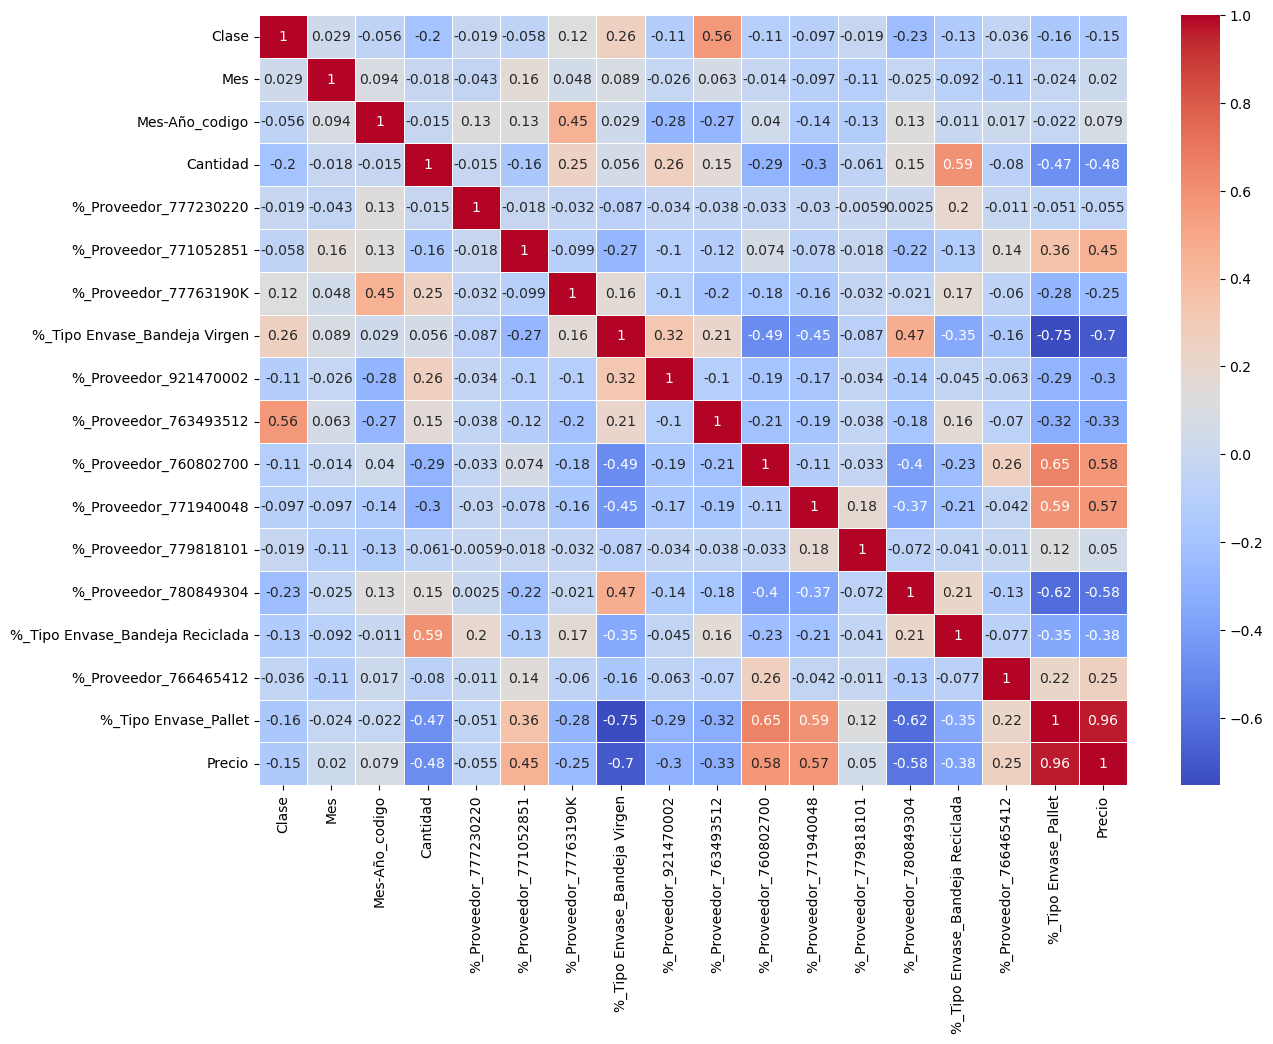

In [54]:
# Matriz de Correlación

df_Corr = Compra.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(df_Corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

800945


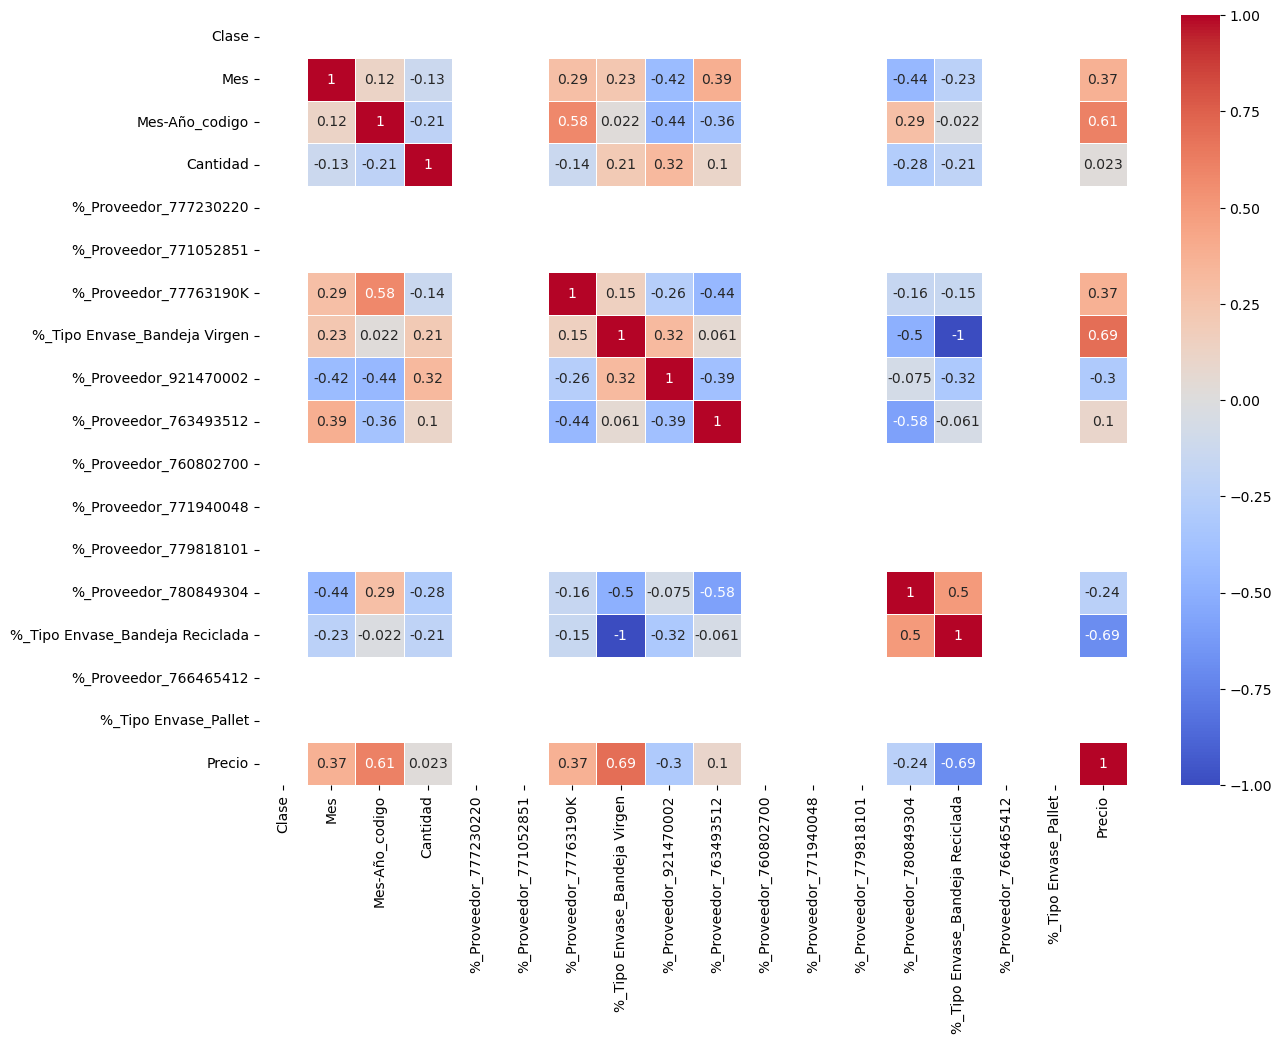

800941


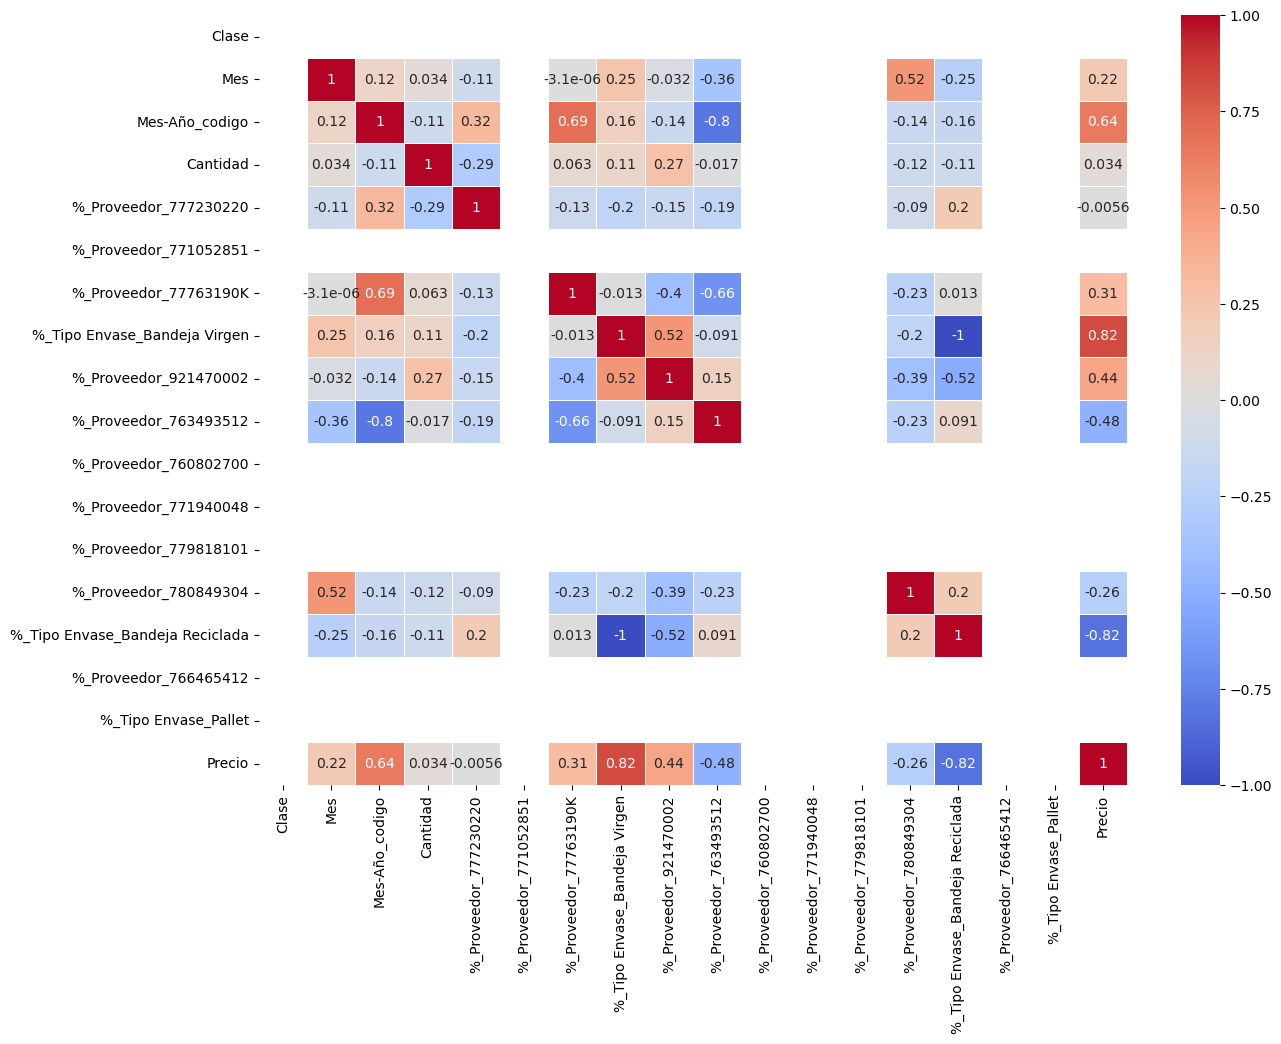

800980


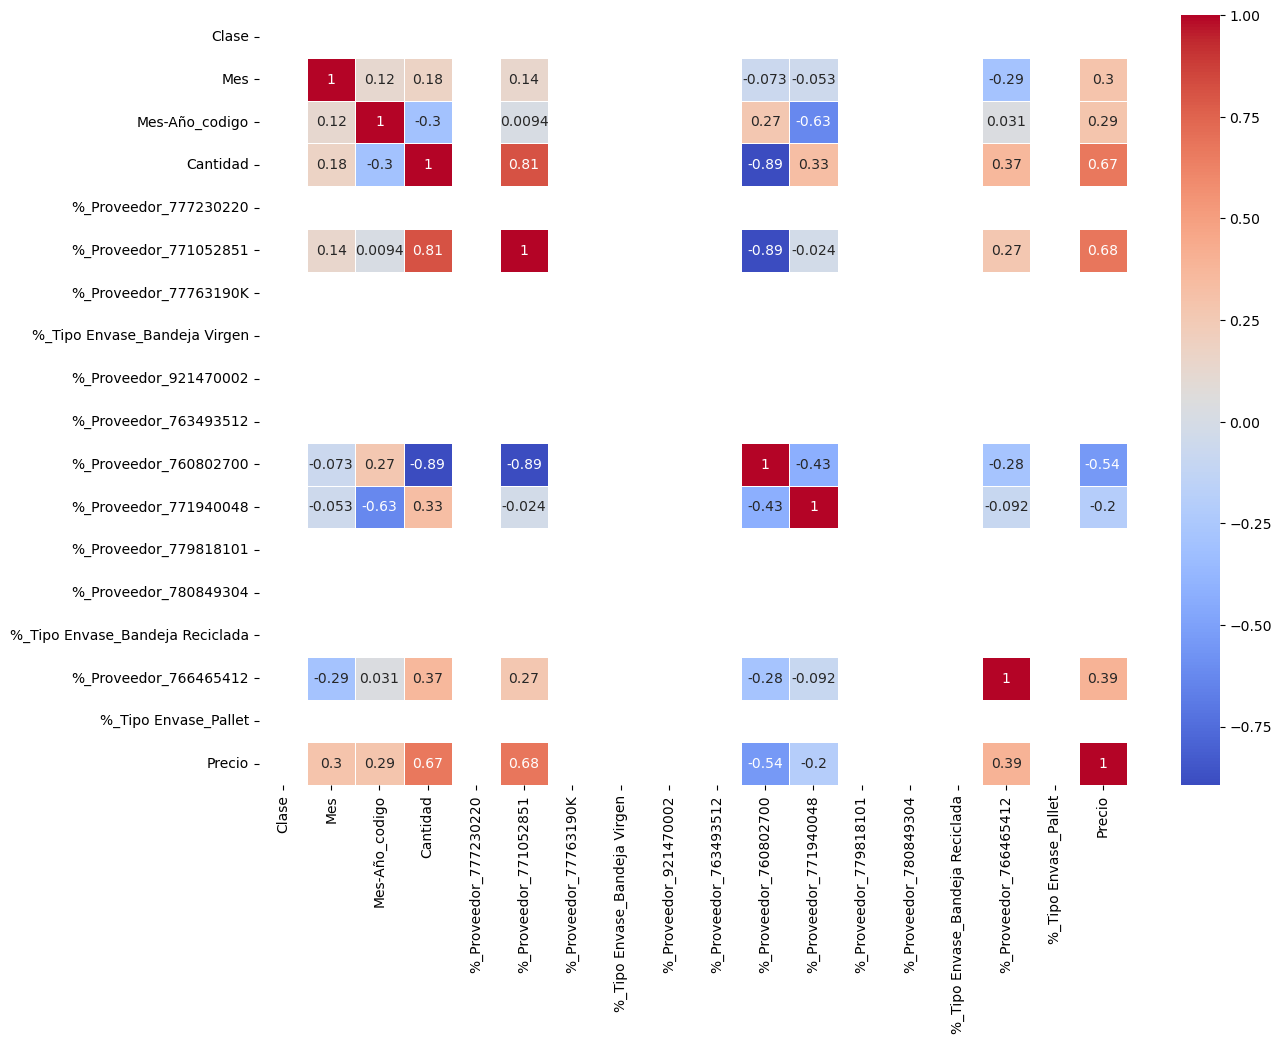

800981


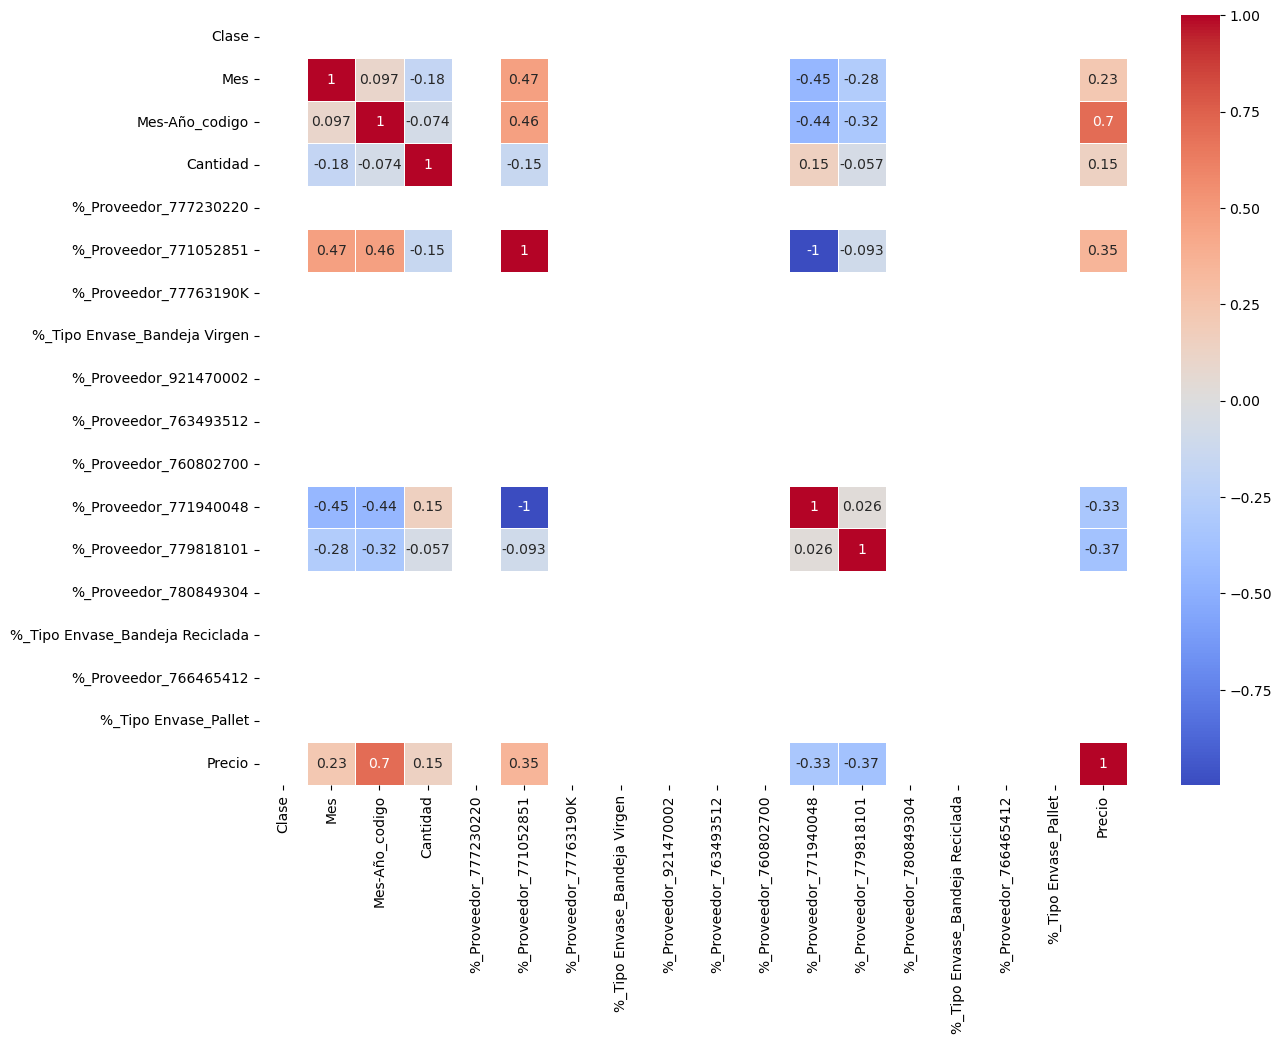

800940


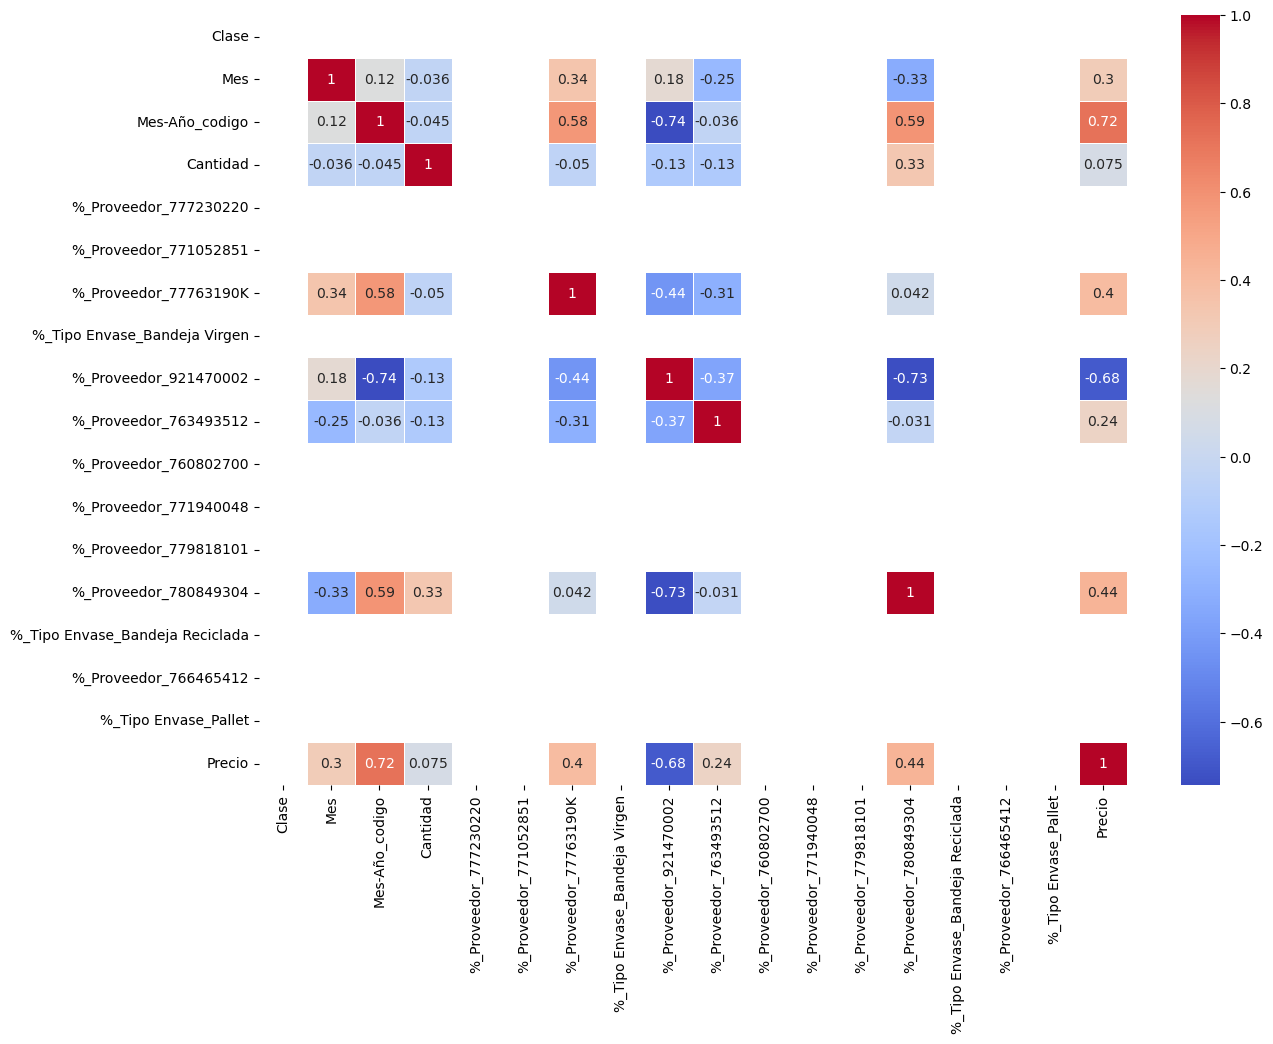

800990


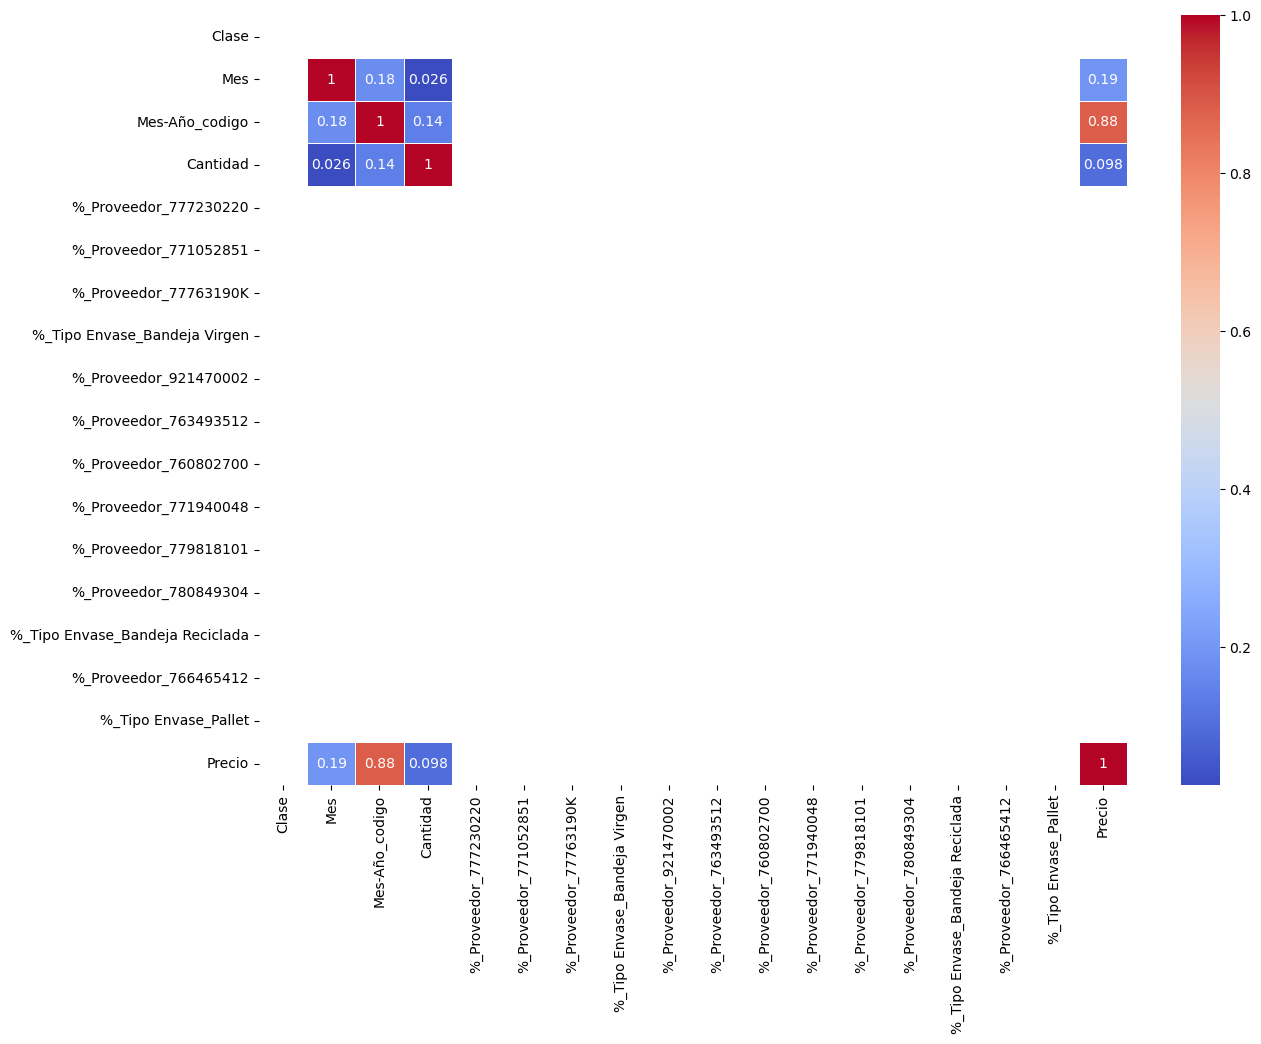

900946


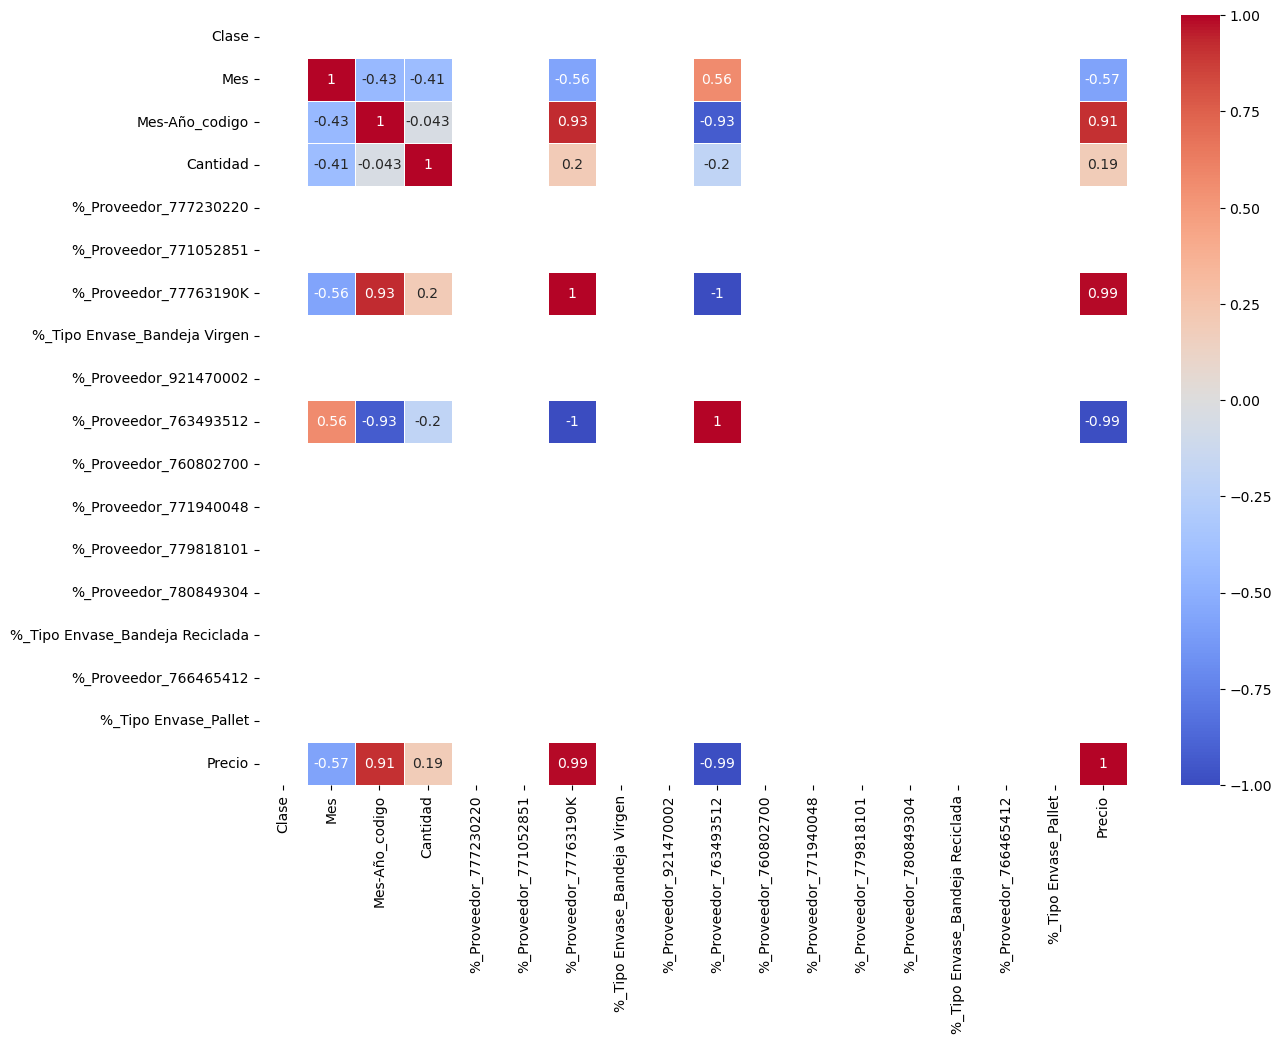

In [55]:
# Matriz de Correlación para cada clase de material

for i in valores_unicos:
    df_Corr = Compra[Compra['Clase'] == i].corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(df_Corr, annot=True, cmap='coolwarm', linewidths=0.5)
    print(i)
    plt.show()

### A continuación, modelaremos tres escenarios diferentes para la predicción del precio de compra de cada clase de envases, de acuerdo a las posibles limitaciones de información a la hora de predecir: 

1) De acuerdo al tiempo
2) De acuerdo al tiempo y demanda
3) De acuerdo al tiempo, demanda, tipo de bandeja (reciclada o virgen) y proveedores

- Para cada escenario evaluaremos usar los modelos de regresión (ya que queremos realizar predicciones sobre valores numéricos) de Machine Learning: Regresión Lineal, Random Forest y XGBoost.
- Las metricas que utilizaremos para evaluar los modelos serán MSE (Error Cuadrático Medio) y r2 (Coeficiente de determinación)

In [66]:
# Modelos elección variables a utilizar

# Regresión Lineal
def stepwise_selection(x, y, threshold_in=0.01, threshold_out=0.05):
    included = []
    while True:
        changed = False
        
        excluded = list(set(x.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
            
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            print(f"Se agrega la columna {best_feature}")
        
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            print(f"Se elimina la columna {worst_feature}")
        
        if not changed:
            break
            
    return included



# Random Forest
def stepwise_rf(x, y, threshold_importance=0.01, n_estimators=100, random_state=55):
    included = []
    changed=True
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    
    while changed:
        changed=False
        
        excluded = list(set(x.columns) - set(included))
        feature_importances = pd.Series(index=excluded, dtype=float)
        
        for new_column in excluded:
            rf_model.fit(x[included + [new_column]], y)
            importance = rf_model.feature_importances_
            feature_importances[new_column] = importance[-1]
            
        best_importance = feature_importances.max()
        if best_importance > threshold_importance:
            best_feature = feature_importances.idxmax()
            included.append(best_feature)
            changed=True
            print(f"Se agrega la columna {best_feature}")
    
    return included


# XGBoost
def stepwise_XGB(x, y, threshold_importance=0.01, n_estimators=100, learning_rate=0.1, random_state=55):
    included = []
    changed=True
    xgb_model = xgb.XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
    
    while changed:
        changed=False
        
        excluded = list(set(x.columns) - set(included))
        feature_importances = pd.Series(index=excluded, dtype=float)
        
        for new_column in excluded:
            xgb_model.fit(x[included + [new_column]], y)
            booster = xgb_model.get_booster()
            scores = booster.get_score(importance_type='weight')
            feature_importances[new_column] = scores.get(new_column, 0)
            
        best_importance = feature_importances.max()
        if best_importance > threshold_importance:
            best_feature = feature_importances.idxmax()
            included.append(best_feature)
            changed=True
            print(f"Se agrega la columna {best_feature}")
    
    return included

In [67]:
Compra = Compra.sort_values(by='Mes-Año_codigo')
x = Compra[['Clase', 'Mes', 'Mes-Año_codigo', 'Cantidad', '%_Proveedor_921470002', '%_Proveedor_780849304', '%_Proveedor_766465412', '%_Proveedor_763493512', '%_Proveedor_777230220', '%_Tipo Envase_Bandeja Virgen', '%_Proveedor_771940048', '%_Proveedor_77763190K', '%_Proveedor_760802700', '%_Proveedor_771052851', '%_Tipo Envase_Pallet', '%_Proveedor_779818101', '%_Tipo Envase_Bandeja Reciclada']]
y = Compra['Precio']

In [68]:
# Regresión Lineal

z = stepwise_selection(x, y)
excluded = list(set(x.columns) - set(z))
print(f"included: {z}")
print(f"excluded: {excluded}")

Se agrega la columna %_Tipo Envase_Pallet
Se agrega la columna %_Proveedor_771052851
Se agrega la columna Mes-Año_codigo
Se agrega la columna %_Proveedor_771940048
Se agrega la columna %_Proveedor_779818101
Se agrega la columna %_Proveedor_760802700
Se agrega la columna %_Proveedor_766465412
Se elimina la columna %_Proveedor_771940048
Se agrega la columna %_Tipo Envase_Bandeja Virgen
Se agrega la columna %_Tipo Envase_Bandeja Reciclada
included: ['%_Tipo Envase_Pallet', '%_Proveedor_771052851', 'Mes-Año_codigo', '%_Proveedor_779818101', '%_Proveedor_760802700', '%_Proveedor_766465412', '%_Tipo Envase_Bandeja Virgen', '%_Tipo Envase_Bandeja Reciclada']
excluded: ['%_Proveedor_763493512', '%_Proveedor_921470002', '%_Proveedor_780849304', 'Cantidad', 'Clase', '%_Proveedor_77763190K', '%_Proveedor_771940048', 'Mes', '%_Proveedor_777230220']


In [69]:
# RandomForest
z = stepwise_rf(x, y)
excluded = list(set(x.columns) - set(z))
print(f"included: {z}")
print(f"excluded: {excluded}")

Se agrega la columna %_Proveedor_763493512
Se agrega la columna Clase
Se agrega la columna %_Tipo Envase_Pallet
Se agrega la columna Mes-Año_codigo
Se agrega la columna %_Proveedor_760802700
included: ['%_Proveedor_763493512', 'Clase', '%_Tipo Envase_Pallet', 'Mes-Año_codigo', '%_Proveedor_760802700']
excluded: ['%_Tipo Envase_Bandeja Virgen', '%_Proveedor_921470002', '%_Proveedor_780849304', 'Cantidad', '%_Proveedor_779818101', '%_Proveedor_77763190K', '%_Proveedor_766465412', '%_Proveedor_777230220', '%_Proveedor_771940048', 'Mes', '%_Tipo Envase_Bandeja Reciclada', '%_Proveedor_771052851']


In [70]:
# XGBoost
z = stepwise_XGB(x, y)
excluded = list(set(x.columns) - set(z))
print(f"included: {z}")
print(f"excluded: {excluded}")     

Se agrega la columna Mes-Año_codigo
Se agrega la columna Cantidad
Se agrega la columna Clase
Se agrega la columna %_Proveedor_780849304
Se agrega la columna Mes
Se agrega la columna %_Tipo Envase_Bandeja Virgen
Se agrega la columna %_Proveedor_760802700
Se agrega la columna %_Tipo Envase_Pallet
Se agrega la columna %_Proveedor_763493512
Se agrega la columna %_Proveedor_771052851
Se agrega la columna %_Proveedor_77763190K
Se agrega la columna %_Proveedor_771940048
Se agrega la columna %_Proveedor_921470002
Se agrega la columna %_Tipo Envase_Bandeja Reciclada
Se agrega la columna %_Proveedor_766465412
Se agrega la columna %_Proveedor_779818101
included: ['Mes-Año_codigo', 'Cantidad', 'Clase', '%_Proveedor_780849304', 'Mes', '%_Tipo Envase_Bandeja Virgen', '%_Proveedor_760802700', '%_Tipo Envase_Pallet', '%_Proveedor_763493512', '%_Proveedor_771052851', '%_Proveedor_77763190K', '%_Proveedor_771940048', '%_Proveedor_921470002', '%_Tipo Envase_Bandeja Reciclada', '%_Proveedor_766465412', '%

###  El modelo Regresión Lineal no será útil para realizar predicciones, ya que no incluye a 'Clase' como variable significativa, siendo que ésta es fundamental para la información que estamos buscando. 

### En el caso de Random Forest, debido a la aleatoriedad no controlable de éste, la variable 'Clase' queda adentro en algunos casos, pero en otros no, por lo que se evaluará de todas formas en el primer escenario.

### Por otro lado, el modelo XGBOOST sería útil para los dos primeros escenarios, pero no para el tercero. Esto porque no considera el total de proveedores, lo cual es contraproducente con el tercer escenario.

### A continuación, analizaremos los dos primeros escenarios, el primero con Random Forest y XGBOOST, y segundo solamente con el modelo XGBOOST. Evaluaremos utilizar entrenamiendo con datos en orden cronógico o aleatorio.

In [71]:
# Escenario 1: RandomForest (entrenamiento random)

Compra = Compra.sort_values(by='Mes-Año_codigo')
x = Compra[['Clase', 'Mes-Año_codigo']]
y = Compra['Precio']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=55)


modeloRF = RandomForestRegressor(n_estimators=100, random_state=55)
modeloRF.fit(x_train, y_train)

y_pred = modeloRF.predict(x_test)

# Evaluar

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE = {mse}")
print(f"r2 = {r2}")

MSE = 78388.74414261013
r2 = 0.9918587144600565


In [72]:
# Escenario 1: XGBOOST (entrenamiento random)

Compra = Compra.sort_values(by='Mes-Año_codigo')
x = Compra[['Clase', 'Mes', 'Mes-Año_codigo']]
y = Compra['Precio']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=55)

# Eligiendo hiperparámetros
modeloXGB = xgb.XGBRegressor(random_state=55)
param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01,0.1, 0.2]
             }

grid_search = GridSearchCV(estimator=modeloXGB, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [73]:
modeloXGB = xgb.XGBRegressor(**best_params)
modeloXGB.fit(x_train, y_train)

y_pred = modeloXGB.predict(x_test)

# Evaluar

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE = {mse}")
print(f"r2 = {r2}")

MSE = 207362.51216734748
r2 = 0.9815894450528193


In [74]:
# Escenario 2: XGBOOST (entrenamiento random)

Compra = Compra.sort_values(by='Mes-Año_codigo')
x = Compra[['Clase', 'Mes', 'Mes-Año_codigo', 'Cantidad']]
y = Compra['Precio']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=55)

# Eligiendo hiperparámetros
modeloXGB = xgb.XGBRegressor(random_state=55)
param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01,0.1, 0.2]
             }

grid_search = GridSearchCV(estimator=modeloXGB, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [75]:
modeloXGB = xgb.XGBRegressor(**best_params)
modeloXGB.fit(x_train, y_train)

y_pred = modeloXGB.predict(x_test)

# Evaluar

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE = {mse}")
print(f"r2 = {r2}")

MSE = 127551.68532057163
r2 = 0.9848037414478619


### El modelo Random Forest, en el primer escenario, entrega mejor resultado que XGBOOST en cualquiera de los escenarios planteados. Esto debido a que, con éste, se obtuvo un menor MSE (suma total de errores cuadráticos) y un r2 más cercano a 1 (menor cantidad de errores residuales), lo que nos lleva a concluir que el mencionado sería el mejor de lo modelos evaluados para predecir el precio de cada clase de material.

# Conclusión

La volatibilidad, tanto en el comportamiento de compra de bandejas recicladas como en la elección de proveedores, no permiten que estas variables nos ayuden a mejorar el modelo. Sin embargo, se logró llegar a un muy buen resultado utilizando solamente las variables de tiempo y clase de material para predecir el precio de cada envase.

El modelo elegido entrega una buena solución a los requerimientos del proyecto, entregando buenas métricas. Para una posible optimización del modelamiento, se sugiere entablar negociaciones con proveedores y así tener una proporción de bandejas recicladas y proveedores más estables, teniendo de esta manera datos menos volátiles.